# Import Library

In [41]:
!pip install -q matplotlib=='3.5.2'

In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
from google.colab import drive

In [43]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


# Import Data from Drive

In [44]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
dataset = '/content/drive/MyDrive/Breast Cancer Dataset'
os.listdir(dataset)

['malignant', 'benign', 'normal']

# Eksplorasi Data

In [46]:
list = []
totalFile = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFile += 1

print('Jumlah direktori data :', totalDir)
print('Jumlah total data :',totalFile)

Jumlah direktori data : 3
Jumlah total data : 770


In [47]:
index = np.arange(1,4,1)
d = {'Kelas': os.listdir(dataset), 'Total_Gambar': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Kelas,Total_Gambar
1,malignant,211
2,benign,425
3,normal,134


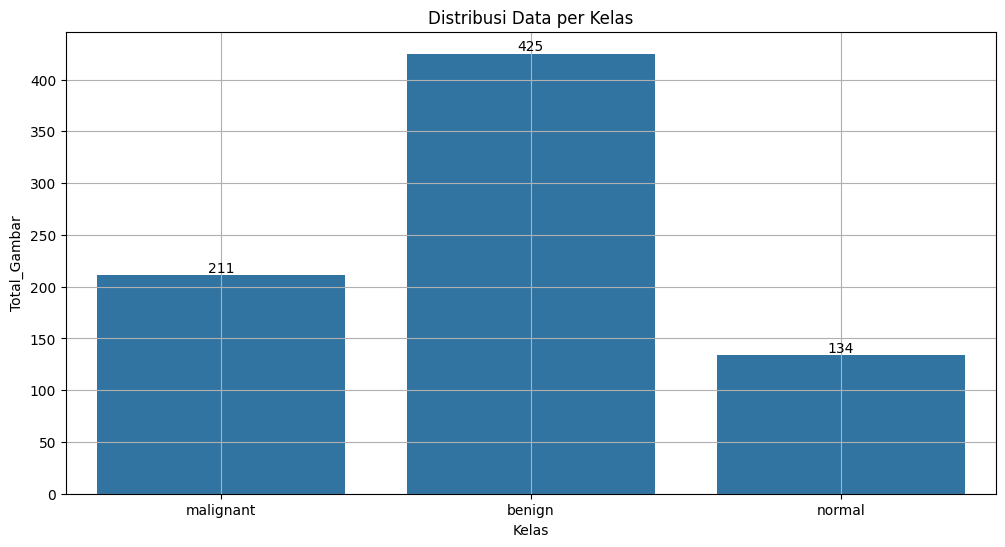

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data1,x='Kelas', y='Total_Gambar')
plt.title('Distribusi Data per Kelas')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [49]:
from tqdm import tqdm

filenames = []
folder = []
image = []
for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]

data2 = pd.DataFrame({'Path Gambar':filenames, 'Kelas':folder, 'Nama Gambar':image})

4it [00:00, 174.46it/s]


In [50]:
extension = []
for i in range (sum(data1['Total_Gambar'])) :
    strValue = data2['Nama Gambar'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [51]:
data2['Ekstensi'] = extension
data2

,Path Gambar,Kelas,Nama Gambar,Ekstensi
0,/content/drive/MyDrive/Breast Cancer Dataset/m...,malignant,malignant (174).png,.png
1,/content/drive/MyDrive/Breast Cancer Dataset/m...,malignant,malignant (135).png,.png
2,/content/drive/MyDrive/Breast Cancer Dataset/m...,malignant,malignant (123).png,.png
3,/content/drive/MyDrive/Breast Cancer Dataset/m...,malignant,malignant (162).png,.png
4,/content/drive/MyDrive/Breast Cancer Dataset/m...,malignant,malignant (88).png,.png
...,...,...,...,...
765,/content/drive/MyDrive/Breast Cancer Dataset/n...,normal,normal (26).png,.png
766,/content/drive/MyDrive/Breast Cancer Dataset/n...,normal,normal (27).png,.png
767,/content/drive/MyDrive/Breast Cancer Dataset/n...,normal,normal (31).png,.png
768,/content/drive/MyDrive/Breast Cancer Dataset/n...,normal,normal (77).png,.png


In [52]:
data2['Ekstensi'].unique()

array(['.png', '.DS_Store'], dtype=object)

In [53]:
data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [54]:
from PIL import Image

total_img = 0
usg_payudara = os.path.join(dataset)
list_data_images = ['normal', 'malignant', 'benign']

for data in list_data_images:
  dir = os.path.join(usg_payudara, data)
  total = len(os.listdir(dir))
  print(data+' : ', total)
  total_img = total_img + total

  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    print('-',img.size)
  print('...................')

print('\nTotal Images :', total_img)

normal :  134
- (685, 558)
- (558, 470)
- (703, 471)
- (560, 470)
- (687, 578)
...................
malignant :  211
- (633, 581)
- (933, 571)
- (321, 483)
- (620, 587)
- (775, 591)
...................
benign :  425
- (756, 578)
- (562, 470)
- (609, 396)
- (551, 488)
- (582, 431)
...................

Total Images : 770


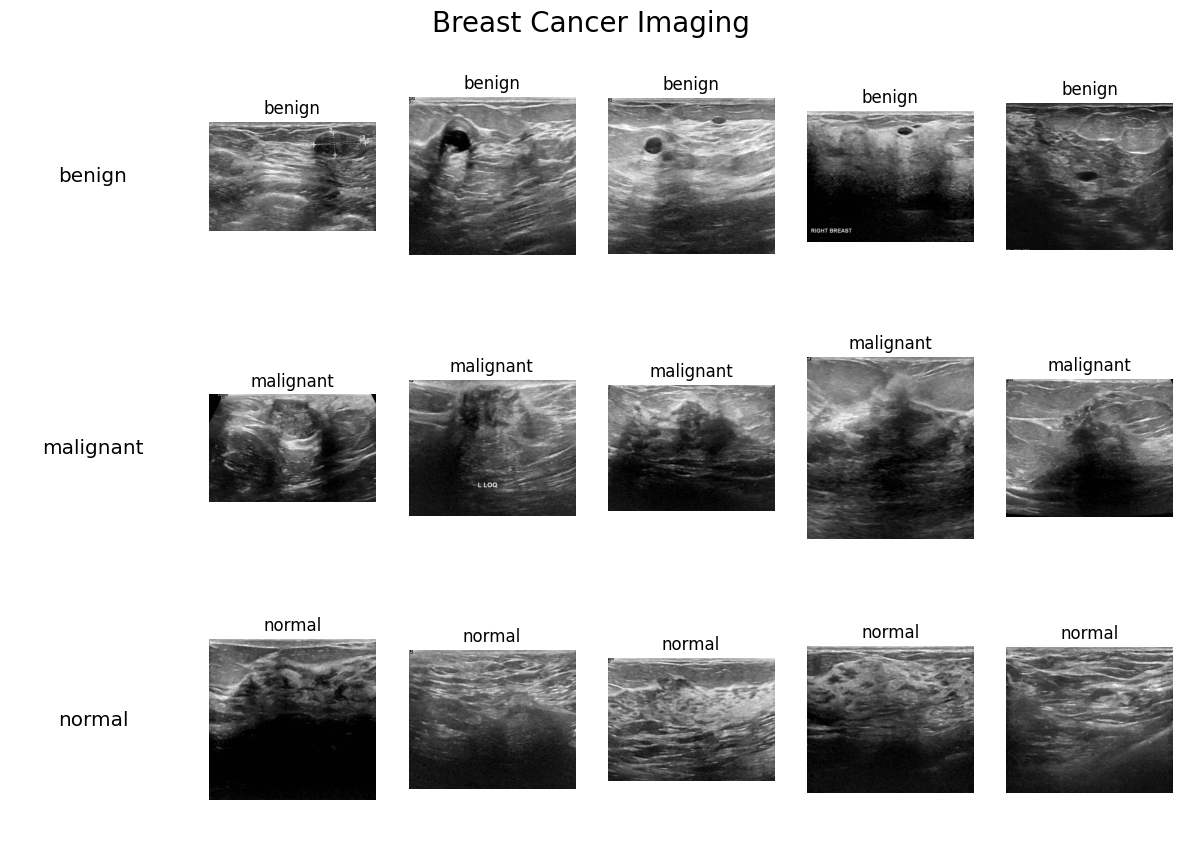

In [55]:
unique_list = []
unique = data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()
fig = plt.figure(figsize=(15,10))
plt.title('Breast Cancer Imaging', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 3
img2show = data2.groupby('Kelas').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Path Gambar'])
        kelas = img2show.iloc[i-1]['Kelas']
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.title(f'{kelas}')
plt.show()


# Undersampling Data

In [56]:
os.listdir(dataset)

['malignant', 'benign', 'normal']

In [57]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [58]:
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d)
data1

,Class,Total_image_in_class
0,malignant,211
1,benign,425
2,normal,134


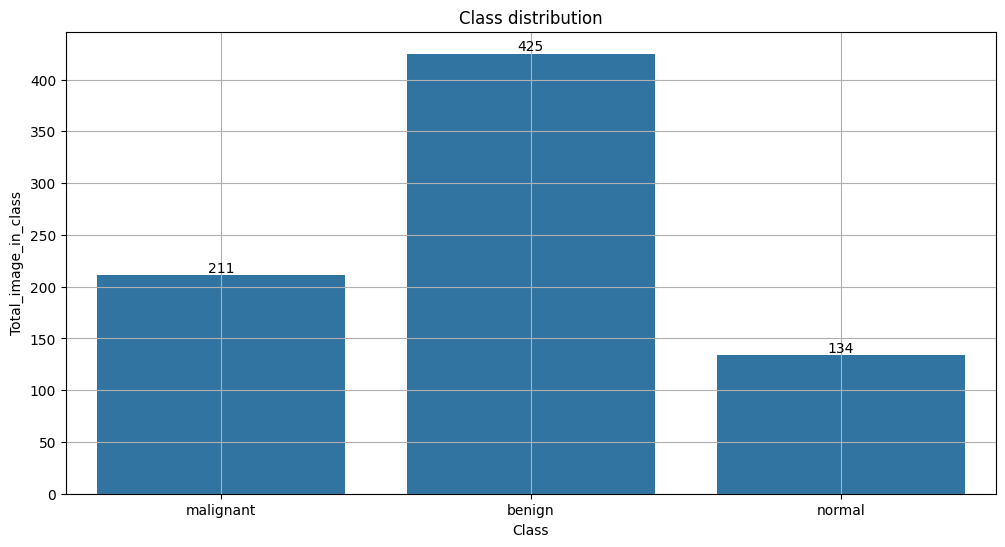

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [60]:
normal_dir = os.path.join(dataset, 'normal')
malignant_dir = os.path.join(dataset, 'malignant')
benign_dir = os.path.join(dataset, 'benign')

In [61]:
import random
import os

path = malignant_dir
n = 30
img_names = os.listdir(path)
img_names = random.sample(img_names, n)
for image in img_names:
  f = os.path.join(path, image)
  os.remove(f)

In [62]:
path = benign_dir
n = 257
img_names = os.listdir(path)
img_names = random.sample(img_names, n)
for image in img_names:
  f = os.path.join(path, image)
  os.remove(f)

In [63]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [64]:
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data2 = pd.DataFrame(data=d)
data2

,Class,Total_image_in_class
0,malignant,181
1,benign,168
2,normal,134


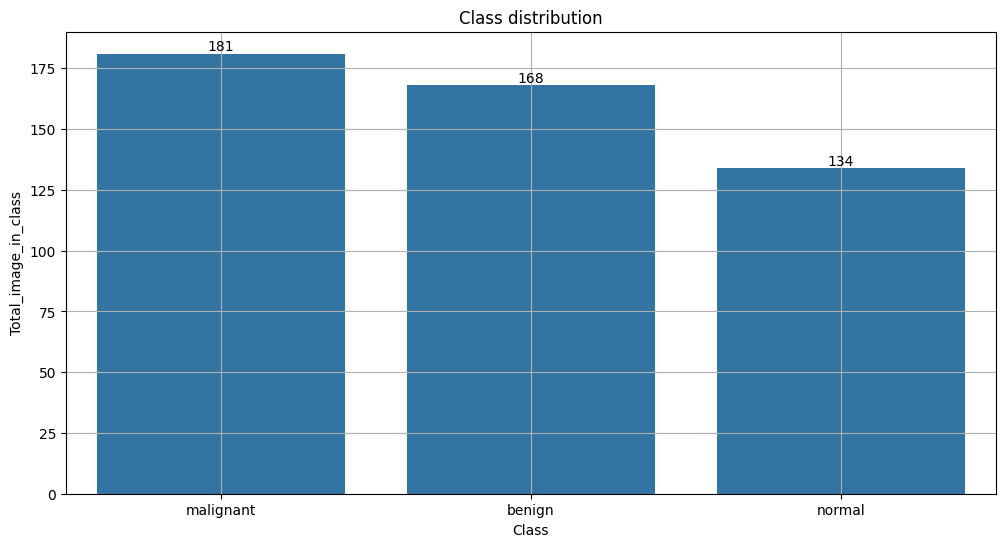

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data2,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()